## 20 newsgroups text classification

In [1]:
from os import listdir
from os.path import isfile, join
import string

In [3]:
my_path = '20_newsgroups/20_newsgroups'

folders = [f for f in listdir(my_path)] #create list of folders

In [5]:
folders

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
#path of all files

files = []
for folder_name in folders:
    folder_path = join(my_path, folder_name)
    files.append([f for f in listdir(folder_path)])

In [9]:
#list of file with full path
pathname_list = []
for fo in range(len(folders)):
    for fi in files[fo]:
        pathname_list.append(join(my_path, join(folders[fo], fi)))

In [10]:
len(pathname_list)

19997

In [11]:
#array of classes for classification

Y = []
for folder_name in folders:
    folder_path = join(my_path, folder_name)
    num_of_files= len(listdir(folder_path))
    for i in range(num_of_files):
        Y.append(folder_name)

In [12]:
len(Y)

19997

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#splitting the data into train test
doc_train, doc_test, Y_train, Y_test = train_test_split(pathname_list, Y, random_state=0, test_size=0.25)

In [15]:
stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at',
 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 
 'can', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during',
 'each', 'few', 'for', 'from', 'further', 
 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's",
 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's",
 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself',
 "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself',
 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own',
 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 
 'than', 'that',"that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", 
 "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 
 'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
 "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's",'will', 'with', "won't", 'would', "wouldn't", 
 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 
 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand', '1st', '2nd', '3rd',
 '4th', '5th', '6th', '7th', '8th', '9th', '10th']


In [16]:
#function to preprocess the words list

def preprocess(words):
    table = str.maketrans('', '', '\t')               #to remove tab 
    words = [word.translate(table) for word in words]
    
    punctuations = (string.punctuation).replace("'", "")   #remove punctuations
    trans_table = str.maketrans('', '', punctuations)
    stripped_words = [word.translate(trans_table) for word in words]
    
    words = [str for str in stripped_words if str]                #to remove white spaces
    
    p_words = []
    for word in words:
        if (word[0] and word[len(word)-1] == "'"):                     #to remove quotation marks
            word = word[1:len(word)-1]
        elif(word[0] == "'"):
            word = word[1:len(word)]
        else:
            word = word
        p_words.append(word)
    
    words = p_words.copy()
        
    words = [word for word in words if not word.isdigit()]      #remove neumeric data
    
    words = [word for word in words if not len(word) == 1]    #remove character with less than 1 lenght
    
    words = [str for str in words if str]                       #to remove white spaces
    
    words = [word.lower() for word in words]                 #covert to lowercase

    words = [word for word in words if len(word) > 2]            #remove character with less than 2 lenght
    
    return words

In [17]:
#function to remove stopwords
def remove_stopwords(words):
    words = [word for word in words if not word in stopwords]
    return words

In [18]:
#function to convert a sentence into list of words
def tokenize_sentence(line):
    words = line[0:len(line)-1].strip().split(" ")
    words = preprocess(words)
    words = remove_stopwords(words)
    
    return words

In [22]:
#function to remove metadata
def remove_metadata(lines):
    for i in range(len(lines)):
        if(lines[i] == '\n'):
            start = i+1
            break
    new_lines = lines[start:]
    return new_lines

In [23]:
#function to convert a document into list of words
def tokenize(path):

    f = open(path, 'r')                   
    text_lines = f.readlines()                 #open file and read data line by line
    
    text_lines = remove_metadata(text_lines)

    doc_words = []
    
    for line in text_lines:
        doc_words.append(tokenize_sentence(line))  #split scentence

    return doc_words

In [24]:
#to change shape for 2d to 1d
def flatten(list):
    new_list = []
    for i in list:
        for j in i:
            new_list.append(j)
    return new_list

In [25]:
len(folders)

20

In [26]:
list_of_words = []

for document in doc_train:
        list_of_words.append(flatten(tokenize(document)))   ##function to get list of all words documents wise

In [27]:
len(list_of_words)

14997

In [28]:
len(flatten(list_of_words))

1909457

In [29]:
import numpy as np
np_list_of_words = np.asarray(flatten(list_of_words))  #to get all words in single list

In [30]:
#unique words and count
words, counts = np.unique(np_list_of_words, return_counts=True)
len(words)

143487

In [31]:
#sorting words according to occurence
freq, wrds = (list(i) for i in zip(*(sorted(zip(counts, words), reverse=True))))

In [32]:
f_o_w = []
n_o_w = []
for f in sorted(np.unique(freq), reverse=True):      #making list for plotting 
    f_o_w.append(f)
    n_o_w.append(freq.count(f))

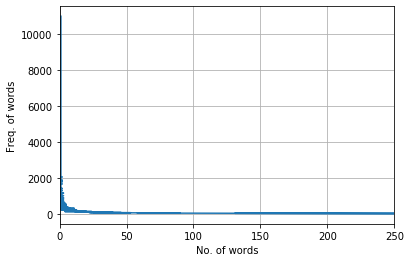

None


In [34]:
import matplotlib.pyplot as plt
y = f_o_w
x = n_o_w
plt.xlim(0,250)
plt.xlabel("No. of words")
plt.ylabel("Freq. of words")
plt.plot(x, y)
plt.grid()
print(plt.show())       

In [35]:
#feature selection and count
n = 5000
features = wrds[0:n]
print(features)

['writes', 'article', 'people', 'like', 'just', 'know', 'get', 'think', 'also', 'use', 'time', 'good', 'now', 'new', 'even', 'see', 'may', 'well', 'make', 'way', 'many', 'much', 'say', 'first', 'god', 'right', 'want', 'anyone', 'said', 'system', 'used', "ax'ax'ax'ax'ax'ax'ax'ax'ax'ax'ax'ax'ax'ax'ax", 'really', 'work', 'need', 'believe', 'something', 'since', 'still', 'please', 'problem', 'back', 'take', 'find', 'going', 'might', 'email', 'using', 'information', 'better', 'point', 'things', 'government', 'never', 'last', 'thanks', 'years', 'file', 'must', 'sure', 'without', 'another', 'someone', 'read', 'made', 'question', 'number', 'help', 'got', 'thing', 'year', 'etc', 'university', 'fact', 'look', 'part', 'world', 'windows', 'come', 'available', 'however', 'program', 'data', 'anything', 'little', 'drive', 'around', 'case', 'seems', 'give', 'true', 'law', 'probably', 'every', 'long', 'different', 'power', 'least', 'day', 'best', 'set', 'actually', 'try', 'put', 'tell', 'course', 'lot'

In [36]:
#creating dict for each document vocablary 
dictionary = {}
doc_num = 1
for doc_words in list_of_words:
    #print(doc_words)
    np_doc_words = np.asarray(doc_words)
    w, c = np.unique(np_doc_words, return_counts=True)
    dictionary[doc_num] = {}
    for i in range(len(w)):
        dictionary[doc_num][w[i]] = c[i]
    doc_num = doc_num + 1

In [38]:
#to find frequencey of feature selected in document for training data
X_train = []
for k in dictionary.keys():
    row = []
    for f in features:
        if(f in dictionary[k].keys()):
            row.append(dictionary[k][f])     #if present in feature frequency will be added to row
        else:
            row.append(0)  #if not present then zero frequency
    X_train.append(row)

In [39]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [40]:
len(X_train)

14997

In [41]:
len(Y_train)

14997

In [42]:
#repating all steps for test data
list_of_words_test = []

for document in doc_test:
        list_of_words_test.append(flatten(tokenize(document)))

In [43]:
dictionary_test = {}
doc_num = 1
for doc_words in list_of_words_test:
    np_doc_words = np.asarray(doc_words)
    w, c = np.unique(np_doc_words, return_counts=True)
    dictionary_test[doc_num] = {}
    for i in range(len(w)):
        dictionary_test[doc_num][w[i]] = c[i]
    doc_num = doc_num + 1

In [44]:
X_test = []
for k in dictionary_test.keys():
    row = []
    for f in features:
        if(f in dictionary_test[k].keys()):
            row.append(dictionary_test[k][f]) 
        else:
            row.append(0)
    X_test.append(row)

In [45]:
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

In [46]:
len(X_test)

5000

In [47]:
len(Y_test)

5000

# Classification using sklearn's Multinomial Naive Bayes

In [48]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()   #using default parameters
clf.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
Y_predict = clf.predict(X_test)

In [50]:
clf.score(X_test, Y_test)

0.7658

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test, Y_predict))

                          precision    recall  f1-score   support

             alt.atheism       0.61      0.73      0.66       233
           comp.graphics       0.60      0.66      0.63       253
 comp.os.ms-windows.misc       0.73      0.65      0.69       249
comp.sys.ibm.pc.hardware       0.66      0.72      0.69       240
   comp.sys.mac.hardware       0.69      0.78      0.73       236
          comp.windows.x       0.78      0.72      0.75       240
            misc.forsale       0.80      0.76      0.78       261
               rec.autos       0.81      0.81      0.81       269
         rec.motorcycles       0.82      0.90      0.86       284
      rec.sport.baseball       0.91      0.90      0.91       248
        rec.sport.hockey       0.87      0.96      0.91       231
               sci.crypt       0.93      0.86      0.89       233
         sci.electronics       0.77      0.70      0.74       244
                 sci.med       0.90      0.86      0.88       256
         

# Multinomial Naive Bayes from scratch

In [53]:
def fit(X_train, Y_train):          #this fit function will provide dictionary of training data
    result = {}
    classes, counts = np.unique(Y_train, return_counts=True)  
    for i in range(len(classes)):
        curr_class = classes[i]
        
        result["TOTAL_DATA"] = len(Y_train)
        result[curr_class] = {}
        
        X_tr_curr = X_train[Y_train == curr_class]
        
        num_features = n
        
        for j in range(num_features):
            result[curr_class][features[j]] = X_tr_curr[:,j].sum() 
                
        result[curr_class]["TOTAL_COUNT"] = counts[i]
    
    return result

In [54]:
#this will calculate probabilities and by taking log and adding them instead of multiplication
def log_probablity(dictionary_train, x, curr_class):
    output = np.log(dictionary_train[curr_class]["TOTAL_COUNT"]) - np.log(dictionary_train["TOTAL_DATA"])
    num_words = len(x)
    for j in range(num_words):
        if(x[j] in dictionary_train[curr_class].keys()):
            xj = x[j]
            count_curr_class_equal_xj = dictionary_train[curr_class][xj] + 1
            count_curr_class = dictionary_train[curr_class]["TOTAL_COUNT"] + len(dictionary_train[curr_class].keys())
            curr_xj_prob = np.log(count_curr_class_equal_xj) - np.log(count_curr_class)
            output = output + curr_xj_prob
        else:
            continue
    
    return output

In [55]:
# this will predict for a single document class
def predictSinglePoint(dictionary_train, x):
    classes = dictionary_train.keys()
    best_p = -10000
    best_class = -1
    for curr_class in classes:
        if(curr_class == "TOTAL_DATA"):
            continue
        p_curr_class = log_probablity(dictionary_train, x, curr_class)
        if(p_curr_class > best_p):
            best_p = p_curr_class
            best_class = curr_class
            
    return best_class

In [56]:
#this will take all documents and pass to single predict one by one 
def predict(dictionary_train, X_test):
    Y_pred = []
    for x in X_test:
        y_predicted = predictSinglePoint(dictionary_train, x)
        Y_pred.append(y_predicted)
    
    #print(Y_pred)
    return Y_pred

In [57]:
train_dictionary = fit(X_train, Y_train)

In [58]:
X_test = []

for key in dictionary_test.keys():
    X_test.append(list(dictionary_test[key].keys()))

In [59]:
y_pred = predict(train_dictionary, X_test)

In [60]:
y_pred = np.asarray(y_pred)

In [61]:
accuracy_score(Y_test, y_pred)

0.5632

In [62]:
print(classification_report(Y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.65      0.64      0.64       233
           comp.graphics       0.51      0.57      0.54       253
 comp.os.ms-windows.misc       0.85      0.26      0.40       249
comp.sys.ibm.pc.hardware       0.63      0.57      0.60       240
   comp.sys.mac.hardware       0.92      0.37      0.53       236
          comp.windows.x       0.52      0.80      0.63       240
            misc.forsale       0.83      0.30      0.44       261
               rec.autos       0.76      0.35      0.48       269
         rec.motorcycles       0.98      0.31      0.47       284
      rec.sport.baseball       0.98      0.61      0.75       248
        rec.sport.hockey       0.86      0.84      0.85       231
               sci.crypt       0.53      0.85      0.65       233
         sci.electronics       0.77      0.32      0.46       244
                 sci.med       0.89      0.61      0.73       256
         

In [63]:
print(confusion_matrix(Y_test, y_pred))

[[149   0   0   0   0   0   0   0   0   0   0   1   0   0   0  24   0  16
   20  23]
 [  3 145   3   9   0  40   0   1   0   0   0  12   0   2   5   5   0   9
   18   1]
 [  2  30  64  12   0  81   0   0   0   0   2  22   1   1   4   1   0   1
   28   0]
 [  2  21   4 137   0  17   5   0   0   0   0  23   4   1   1   2   0   4
   19   0]
 [  1  12   1  30  87  14   3   0   0   0   3  20   7   4   2   0   0   7
   44   1]
 [  0  19   1   1   0 193   0   0   0   0   1   5   0   1   0   0   0   5
   14   0]
 [  0  19   1  24   7   7  78   8   0   0   6  16   8   3  12   2   2  19
   48   1]
 [  1   2   0   0   0   2   6  93   0   1   2   3   3   2   3   2   3  32
  113   1]
 [  1   2   0   1   0   1   1  19  87   0   0   3   0   2   0   2   3  26
  133   3]
 [  2   3   0   0   0   1   0   0   0 152  12   2   0   2   0   3   3  15
   51   2]
 [  0   0   0   0   0   0   0   0   0   0 194   1   0   0   0   1   0   5
   29   1]
 [  1   1   1   0   0   3   0   0   0   0   0 197   0   0   0   2